In [1]:
import numpy as np
from astropy import units as u 
from astropy.io import fits
import matplotlib.pyplot as plt
import aplpy
import colorcet
import matplotlib as mpl

plt.style.use('paper.mplstyle')

In [2]:
inputfile_max = '/Users/abarnes/Dropbox/work/Smallprojects/aces/data/alma/12m7mtp_bubble/hnco43.TP_7M_12M_weighted_mosaic.rebin.K.kms.0.5kmschannel.galactic.max.fits'
hdu_max = fits.open(inputfile_max)[0]

mask = hdu_max.data<-1000
mask[np.isnan(hdu_max.data)] = True

print('%0.1f %0.1f' %(hdu_max.header['BMAJ']*3600, hdu_max.header['BMIN']*3600))

2.8 2.8


In [3]:
xcentre = 0.8041918903
ycentre = -0.1838483592
r_inner = 79/3600
r_outer = 154/3600

vmin = 0.2, vmax = 8.0


/Users/abarnes/opt/anaconda3/lib/python3.9/site-packages/astropy/visualization/wcsaxes/core.py:257: UserWarning: No contour levels were found within the data range.
  cset = super().contour(*args, **kwargs)


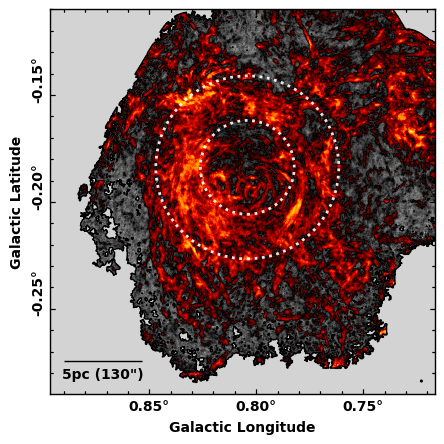

In [4]:
cmap1 = plt.cm.binary(np.linspace(0., 1, 128))
# cmap2 = plt.cm.hot(np.linspace(0, 1, 128))
cmap2 = colorcet.cm.fire(np.linspace(0, 1, 128))
cmaplist = np.vstack((cmap1, cmap2))
cmap = mpl.colors.LinearSegmentedColormap.from_list('my_colormap', cmaplist)
cmap.set_under(cmap(0))
cmap.set_bad(color=cmap(0))


l = 0.8065474
b = -0.1999737
width = 0.2*0.9
height = 0.2*0.9

fig = plt.figure(figsize=(5, 5)) 

ax = aplpy.FITSFigure(hdu_max, figure=fig, subplot=(1,1,1))
vmin, vmax = np.nanpercentile(hdu_max.data, [0.05,99.99])
print('vmin = %0.1f, vmax = %0.1f' %(vmin, vmax))

# ax.show_colorscale(cmap='magma', vmin=vmin, vmax=vmax, stretch='sqrt')
ax.show_colorscale(cmap=cmap, vmin=vmin, vmax=vmax, stretch='sqrt')

ax.recenter(l, b, width=width, height=height)
ax.tick_labels.set_xformat('dd.dd')
ax.tick_labels.set_yformat('dd.dd')
ax.ticks.set_color('black')

ax.show_ellipses(xcentre, ycentre, r_inner*2, r_inner*2, edgecolor='white', linestyles='dotted', linewidths=2, zorder=10., alpha=0.9)
ax.show_ellipses(xcentre, ycentre, r_outer*2, r_outer*2, edgecolor='white', linestyles='dotted', linewidths=2, zorder=10., alpha=0.9)

ax.set_nan_color('lightgrey')
ax.show_contour(mask*1, levels=[0], colors='black', linewidths=1)

ax.add_beam()
ax.beam.set_color('white')
ax.beam.set_edgecolor('black')
ax.beam.set_corner('bottom right')

ax.add_scalebar(130*u.arcsec, corner='bottom left')
ax.scalebar.set_label('5pc (130")')

for i, ax in enumerate(fig.get_axes()):
    if i in [0,3,6]:
        axes = fig.get_axes()
        ra_ = axes[i].coords[0]
        dec_ = axes[i].coords[1]
        dec_.ticklabels.set_rotation(90)

fig.savefig('../figures/hnco_max.pdf')

/Users/abarnes/opt/anaconda3/lib/python3.9/site-packages/astropy/visualization/wcsaxes/core.py:257: UserWarning: No contour levels were found within the data range.
  cset = super().contour(*args, **kwargs)


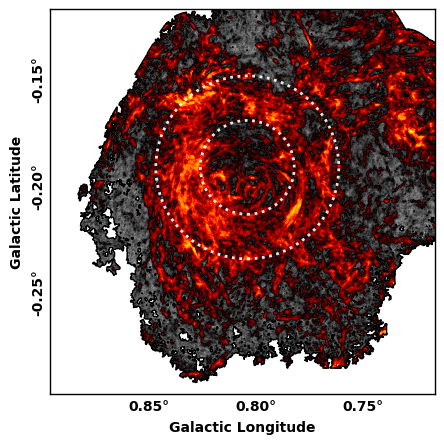

In [7]:
cmap1 = plt.cm.binary(np.linspace(0., 1, 128))
# cmap2 = plt.cm.hot(np.linspace(0, 1, 128))
cmap2 = colorcet.cm.fire(np.linspace(0, 1, 128))
cmaplist = np.vstack((cmap1, cmap2))
cmap = mpl.colors.LinearSegmentedColormap.from_list('my_colormap', cmaplist)
cmap.set_under(cmap(0))
cmap.set_bad(color=cmap(0))


l = 0.8065474
b = -0.1999737
width = 0.2*0.9
height = 0.2*0.9

fig = plt.figure(figsize=(5, 5)) 

ax = aplpy.FITSFigure(hdu_max, figure=fig, subplot=(1,1,1))
vmin, vmax = np.nanpercentile(hdu_max.data, [0.05,99.99])

# ax.show_colorscale(cmap='magma', vmin=vmin, vmax=vmax, stretch='sqrt')
ax.show_colorscale(cmap=cmap, vmin=vmin, vmax=vmax, stretch='sqrt')

ax.recenter(l, b, width=width, height=height)
ax.tick_labels.set_xformat('dd.dd')
ax.tick_labels.set_yformat('dd.dd')
ax.ticks.set_color('none')
ax.show_ellipses(xcentre, ycentre, r_inner*2, r_inner*2, edgecolor='white', linestyles='dotted', linewidths=2, zorder=10., alpha=0.9)
ax.show_ellipses(xcentre, ycentre, r_outer*2, r_outer*2, edgecolor='white', linestyles='dotted', linewidths=2, zorder=10., alpha=0.9)
ax.set_nan_color('none')
ax.show_contour(mask*1, levels=[0], colors='black', linewidths=1)

# ax.add_scalebar(130*u.arcsec, corner='bottom left')
# ax.scalebar.set_label('5pc (130")')

for i, ax in enumerate(fig.get_axes()):
    if i in [0,3,6]:
        axes = fig.get_axes()
        ra_ = axes[i].coords[0]
        dec_ = axes[i].coords[1]
        dec_.ticklabels.set_rotation(90)

fig.savefig('../figures/hnco_max_transp.pdf', transparent=True)

/Users/abarnes/opt/anaconda3/lib/python3.9/site-packages/astropy/visualization/mpl_normalize.py:179: RuntimeWarning: invalid value encountered in divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/abarnes/opt/anaconda3/lib/python3.9/site-packages/astropy/visualization/mpl_normalize.py:179: RuntimeWarning: invalid value encountered in divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/abarnes/opt/anaconda3/lib/python3.9/site-packages/astropy/visualization/mpl_normalize.py:179: RuntimeWarning: invalid value encountered in divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/abarnes/opt/anaconda3/lib/python3.9/site-packages/astropy/visualization/mpl_normalize.py:179: RuntimeWarning: invalid value encountered in divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/abarnes/opt/anaconda3/lib/python3.9/site-packages/astropy/visualization/mpl_normalize.py:179: RuntimeWarning: invalid value encountered in di

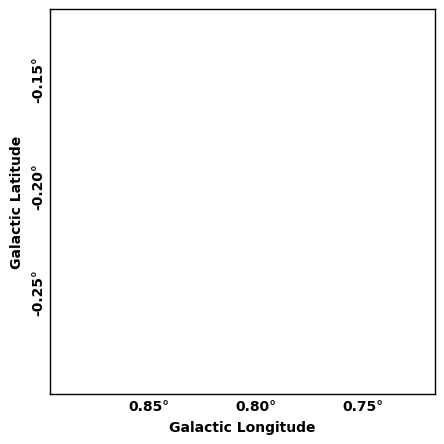

In [6]:
cmap1 = plt.cm.binary(np.linspace(0., 1, 128))
# cmap2 = plt.cm.hot(np.linspace(0, 1, 128))
cmap2 = colorcet.cm.fire(np.linspace(0, 1, 128))
cmaplist = np.vstack((cmap1, cmap2))
cmap = mpl.colors.LinearSegmentedColormap.from_list('my_colormap', cmaplist)
cmap.set_under(cmap(0))
cmap.set_bad(color=cmap(0))


l = 0.8065474
b = -0.1999737
width = 0.2*0.9
height = 0.2*0.9

fig = plt.figure(figsize=(5, 5)) 

ax = aplpy.FITSFigure(hdu_max, figure=fig, subplot=(1,1,1))
# vmin, vmax = np.nanpercentile(hdu_max.data, [0.05,99.99])

ax.show_colorscale(cmap='binary', vmin=-100, vmax=-100, stretch='sqrt')
# ax.show_colorscale(cmap=cmap, vmin=vmin, vmax=vmax, stretch='sqrt')

ax.recenter(l, b, width=width, height=height)
ax.tick_labels.set_xformat('dd.dd')
ax.tick_labels.set_yformat('dd.dd')
ax.ticks.set_color('white')
# ax.show_ellipses(0.8119, -0.1868, 240/3600, 240/3600, edgecolor='white', linestyles='dotted', linewidths=2)
# ax.set_nan_color('lightgrey')
# ax.show_contour(mask*1, levels=[0], colors='black', linewidths=1)

# ax.add_scalebar(130*u.arcsec, corner='bottom left')
# ax.scalebar.set_label('5pc (130")')

for i, ax in enumerate(fig.get_axes()):
    if i in [0,3,6]:
        axes = fig.get_axes()
        ra_ = axes[i].coords[0]
        dec_ = axes[i].coords[1]
        dec_.ticklabels.set_rotation(90)

fig.savefig('../figures/hnco_max_none.pdf', transparent=False)